In [49]:
import src as fa
import pickle
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from datetime import timedelta

In [50]:
model = pickle.load(open("run_output/run_output_model.p", "rb"))

Predict run finished in: (Time) 0:00:00.566671


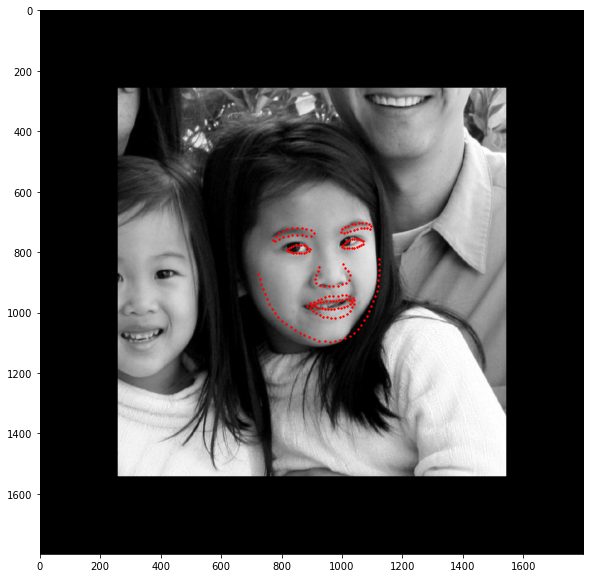

In [92]:
test_image_number = 0

test_names = fa.get_all_file_names('data/test')
test_file_name = test_names[test_image_number]

predict_start_time = timer()
predict_result = model.predict("data/test/"+test_file_name)
predict_end_time = timer()

if predict_result is None:
    print("prediction failed ...")
else:
    I_padded, S_hat_predicted, features_hat_predicted = predict_result
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    ax.scatter(S_hat_predicted[:,0], S_hat_predicted[:,1], c='r', s=2)
    ax.imshow(I_padded, cmap='gray')

print("Predict run finished in: (Time)", timedelta(seconds=predict_end_time-predict_start_time))


In [93]:
train_image_number = 0

train_names = fa.get_all_file_names('data/test')
train_file_name = train_names[train_image_number]

validate_start_time = timer()
validate_result = model.validate_train_image("data/train_1/"+train_file_name)
validate_end_time = timer()


if validate_result is None:
    print("validation failed ...")
else:
    validation_error = predict_result
    # fig, ax = plt.subplots()
    # fig.set_size_inches(15, 10)
    # ax.scatter(S_hat_predicted[:,0], S_hat_predicted[:,1], c='r', s=2)
    # ax.imshow(I_padded, cmap='gray')

print("Validation run finished in: (Time)", timedelta(seconds=validate_end_time-validate_start_time))

print("Validation error:", validation_error)

AttributeError: 'MultipleCascades' object has no attribute 'validate_train_image'